In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_notes=50
sequence_length=30
num_sequences=1000

In [3]:
np.random.seed(42)
data=np.random.randint(0,num_notes,size=(num_sequences,sequence_length))

x_train=data[:,:-1]
y_train=data[:,1:]

x_train=to_categorical(x_train,num_classes=num_notes)
y_train=to_categorical(y_train,num_classes=num_notes)

model=models.Sequential()

model.add(layers.Bidirectional(layers.SimpleRNN(128,return_sequences=True)))
model.add(layers.Bidirectional(layers.SimpleRNN(128,return_sequences=True)))
model.add(layers.TimeDistributed(layers.Dense(num_notes,activation='softmax')))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.1169 - loss: 3.6950 - val_accuracy: 0.6003 - val_loss: 2.6761
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7305 - loss: 2.3502 - val_accuracy: 0.9029 - val_loss: 1.6128
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9309 - loss: 1.3402 - val_accuracy: 0.9569 - val_loss: 0.8536
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9626 - loss: 0.6859 - val_accuracy: 0.9653 - val_loss: 0.4612
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9661 - loss: 0.3756 - val_accuracy: 0.9657 - val_loss: 0.3048
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9666 - loss: 0.2553 - val_accuracy: 0.9659 - val_loss: 0.2423
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9677 - loss: 0.2030 - val_accuracy: 0.9659 - val_loss: 0.2136
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9690 - loss: 0.1760 - val_accuracy: 0

In [5]:
def plot_training_history(history):
    plt.figure(figsize=(12,6))
    
    #Loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],label='Training Loss')
    plt.plot(history.history['val_loss'],label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    
    #Acuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

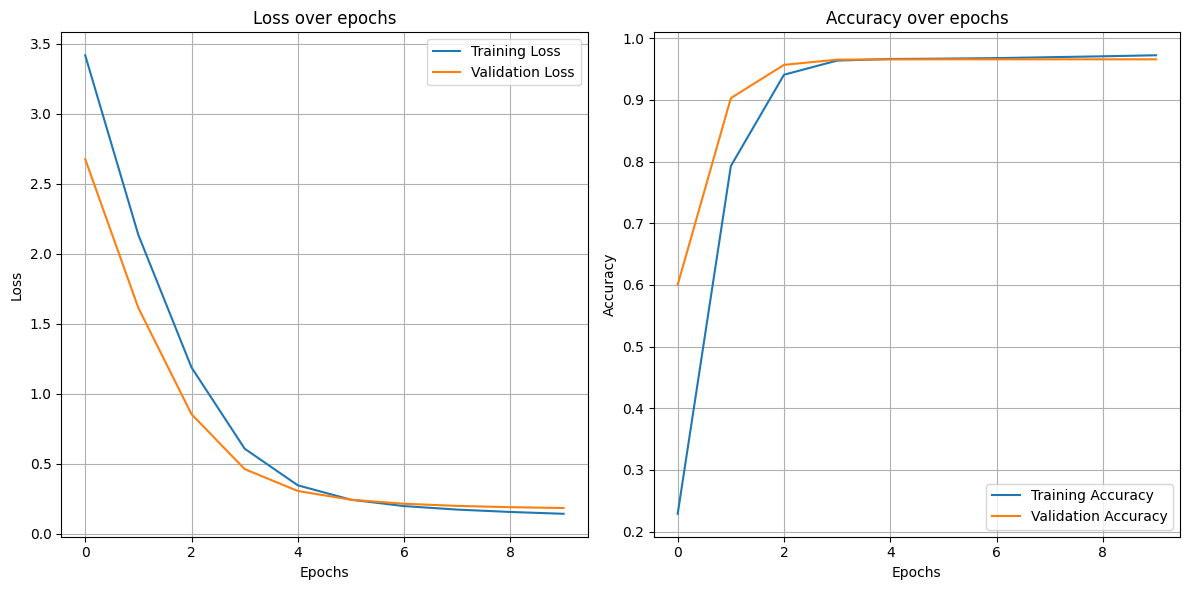

In [6]:
plot_training_history(history)

In [7]:
def generate_music(model,start_sequence,num_generated_notes=50):
    generated=[]
    current_sequence=start_sequence
    for _ in range(num_generated_notes):
        pred=model.predict(current_sequence,verbose=0)
        next_note=np.argmax(pred[:,-1,:],axis=-1)
        generated.append(next_note[0])
        next_note_one_hot=to_categorical(next_note,num_classes=num_notes).reshape(1,1,num_notes)
        current_sequence=np.concatenate([current_sequence[:,1:,:],next_note_one_hot],axis=1)
    return generated

In [8]:
start_sequence=np.random.randint(0,num_notes,size=(1,sequence_length-1))
start_sequence=to_categorical(start_sequence,num_classes=num_notes)

#Genration of new sequence notes
generated_music=generate_music(model,start_sequence,num_generated_notes=50)

In [9]:
def plot_piano_roll(generated_music,num_notes):
    piano_roll=np.zeros((num_notes,len(generated_music)))
    for t,note in enumerate(generated_music):
        piano_roll[note,t]=1
    
    plt.figure(figsize=(15,6))
    sns.heatmap(
        piano_roll,
        cmap="coolwarm",
        cbar=True,
        xticklabels=10 , yticklabels=True,
        linewidths=0.1,linecolor='gray'
    )
    plt.title("Piano Roll Representation of Generated Music")
    plt.xlabel("Time Steps")
    plt.ylabel("Notes")
    plt.yticks(ticks=np.arange(0,num_notes,step=5),labels=np.arange(0,num_notes,step=5))
    plt.yticks(ticks=np.arange(0,len(generated_music),step=5),labels=np.arange(0,len(generated_music),step=5))
    plt.show()

In [10]:
print(generated_music)

[np.int64(44), np.int64(2), np.int64(9), np.int64(46), np.int64(16), np.int64(22), np.int64(15), np.int64(12), np.int64(13), np.int64(26), np.int64(12), np.int64(6), np.int64(16), np.int64(12), np.int64(6), np.int64(26), np.int64(12), np.int64(6), np.int64(33), np.int64(34), np.int64(31), np.int64(33), np.int64(34), np.int64(31), np.int64(33), np.int64(36), np.int64(40), np.int64(16), np.int64(22), np.int64(36), np.int64(33), np.int64(31), np.int64(41), np.int64(49), np.int64(37), np.int64(44), np.int64(1), np.int64(9), np.int64(46), np.int64(12), np.int64(23), np.int64(41), np.int64(30), np.int64(40), np.int64(16), np.int64(22), np.int64(14), np.int64(4), np.int64(11), np.int64(20)]


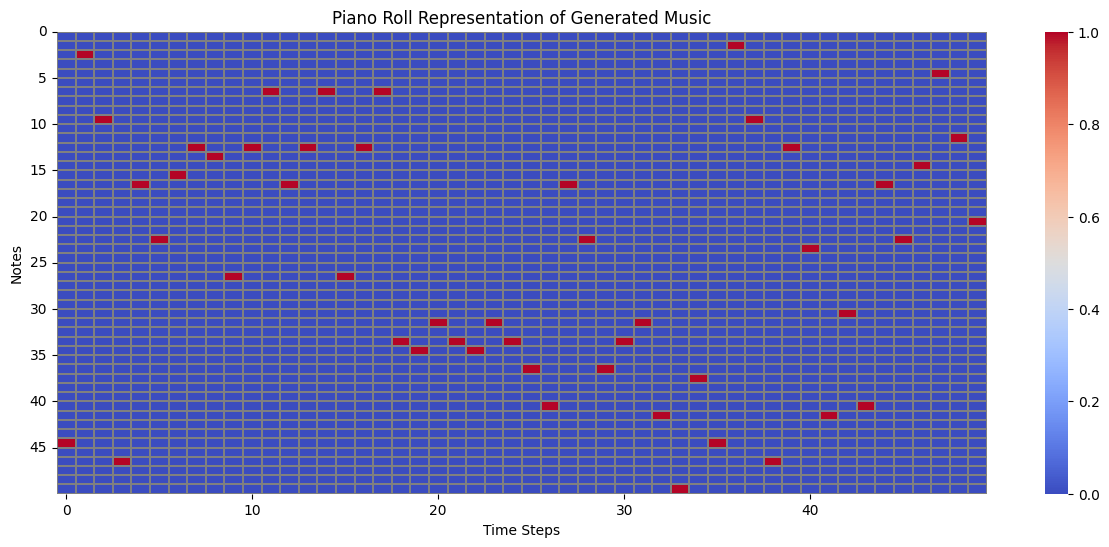

In [11]:
plot_piano_roll(generated_music,num_notes)